In [1]:
pip install scikit-learn pandas numpy


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [4]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42)


In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_feats = vectorizer.fit_transform(X_train)
X_test_feats = vectorizer.transform(X_test)


In [7]:
model = MultinomialNB()
model.fit(X_train_feats, y_train)


MultinomialNB()

In [8]:
y_pred = model.predict(X_test_feats)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [9]:
new_email = ["Congratulations! You've won a free ticket. Click to claim now."]
new_feats = vectorizer.transform(new_email)
prediction = model.predict(new_feats)
print("Predicted label:", prediction[0])


Predicted label: spam


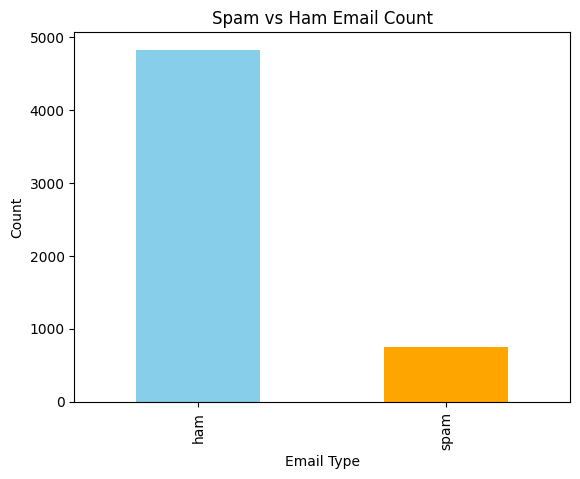

In [10]:
import matplotlib.pyplot as plt

data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Spam vs Ham Email Count')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


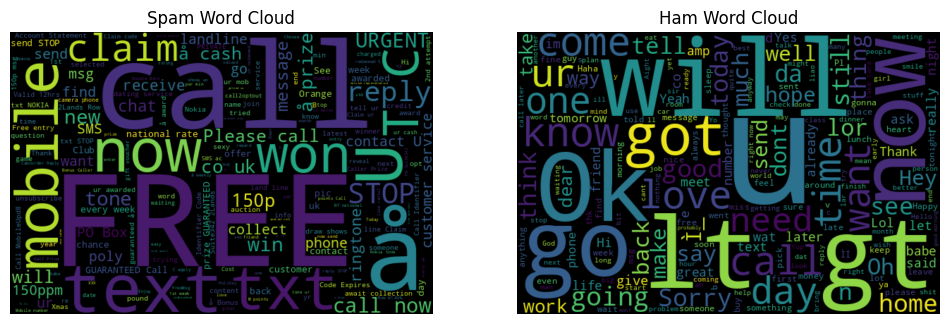

In [16]:
from wordcloud import WordCloud

spam_words = ' '.join(data[data['label']=='spam']['text'])
ham_words = ' '.join(data[data['label']=='ham']['text'])

wordcloud_spam = WordCloud(width=600, height=400).generate(spam_words)
wordcloud_ham = WordCloud(width=600, height=400).generate(ham_words)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


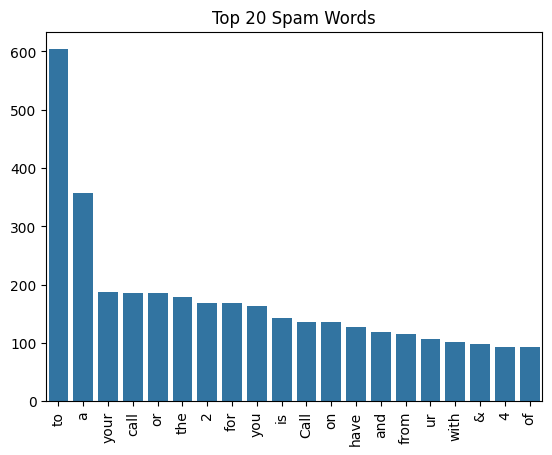

In [12]:
from collections import Counter
import seaborn as sns

spam_words_list = ' '.join(data[data['label']=='spam']['text']).split()
common_spam_words = Counter(spam_words_list).most_common(20)

words, counts = zip(*common_spam_words)
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=90)
plt.title('Top 20 Spam Words')
plt.show()


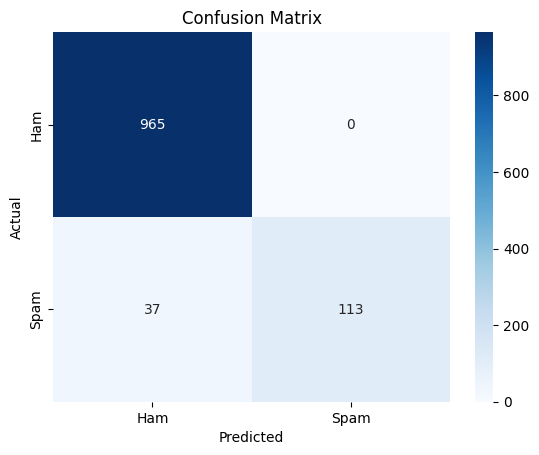

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


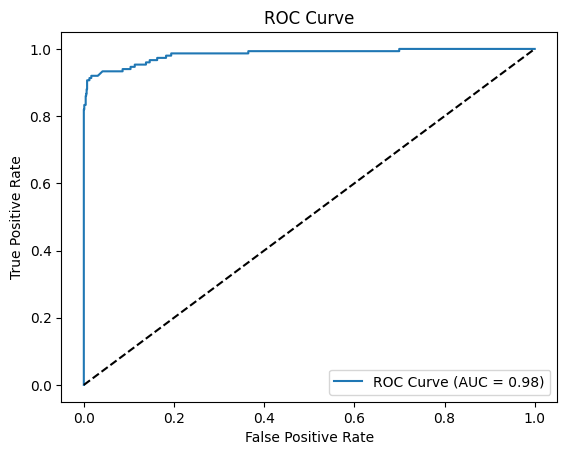

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_feats)[:,1]
fpr, tpr, _ = roc_curve(y_test.map({'ham':0, 'spam':1}), y_prob)
auc = roc_auc_score(y_test.map({'ham':0, 'spam':1}), y_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [15]:
pip install wordcloud


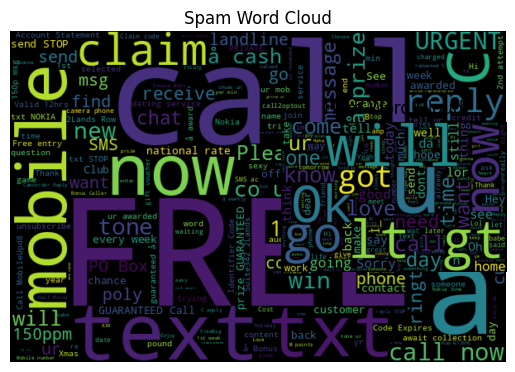

In [17]:
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)  # move to the second plot for ham words
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()  # finally render the figure
